In [1]:
reload_toocan = False # part of code that takes long time
TESTING = True # If true, will only use limited number of timesteps, takes a long time otherwise

<span style="color:pink">## choose subregion</span>

In [2]:
lon_min_subregion = 130
lon_max_subregion = 165
lat_min_subregion = 0
lat_max_subregion = 20

# Imports

In [33]:
%reload_ext autoreload
%matplotlib inline

In [34]:
%autoreload 2

import sys,os,glob
import psutil

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
import pandas as pd
from pprint import pprint
import datetime as dt


from matplotlib.colors import LogNorm
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs

import datetime as dt
import re
import gc
import matplotlib.animation as animation
import warnings
import pickle
from scipy.interpolate import interp1d


#-- Own settings

sys.path.append('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts/start')


from my_functions import *
from load_TOOCAN_DYAMOND_modif_BF import load_TOOCAN_DYAMOND

# Paths

In [5]:
# path = '/home/gmaxemin/windows/internship_g_maxemin/DYAMOND_REGIONS'
toocan_path = "/data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOBAL/2016/FileTracking"
# filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'
toocan_filename = 'TOOCAN-GLOBAL-20160801-20160831.dat.gz'

In [6]:
#-- Paths

# DIR_DYAMOND (where DYAMOND data are)

path_DYAMOND_REGIONS = '/data/bfildier/DYAMOND_REGIONS/'
path_reg1_SAM = os.path.join(path_DYAMOND_REGIONS, "130E_165E_0N_20N/SAM")
path_2D = os.path.join(path_reg1_SAM,'2D')

DIR_DYAMOND = path_2D
print(DIR_DYAMOND)

# DIR_DATA (where segmentation relation table is)

DIR_DATA = "/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/input/"

/data/bfildier/DYAMOND_REGIONS/130E_165E_0N_20N/SAM/2D


In [7]:
# Load relation table DYAMOND-TOOCAN
filename_table = 'relation_2_table_UTC_dyamond_segmentation.csv'
# load
df = pd.read_csv(os.path.join('/home/gmaxemin/code/stage-2023-rain-extremes-timing-intensity/scripts',filename_table))
# sort
df.sort_values(by='UTC',ignore_index=True,inplace=True)
# show
df

,Unnamed: 0,Unnamed: 0.4,Unnamed: 0.3,Unnamed: 0.2,img_seg_path,str_code,Unnamed: 0.1,Unnamed: 0.1.1,year,month,day,hour,minute,path_dyamond,UTC
0,476,476.0,476.0,476.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-1-30,2.0,2.0,2016.0,8.0,1.0,1.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000720,17014.03
1,443,443.0,443.0,443.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-0,3.0,3.0,2016.0,8.0,1.0,2.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000000960,17014.04
2,468,468.0,468.0,468.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-2-30,4.0,4.0,2016.0,8.0,1.0,2.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001200,17014.05
3,432,432.0,432.0,432.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-0,5.0,5.0,2016.0,8.0,1.0,3.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001440,17014.06
4,437,437.0,437.0,437.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-8-1-3-30,6.0,6.0,2016.0,8.0,1.0,3.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000001680,17014.07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1914,1295,1295.0,1295.0,1295.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-22-30,1916.0,1916.0,2016.0,9.0,9.0,22.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460080,17053.45
1915,1315,1315.0,1315.0,1315.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-0,1917.0,1917.0,2016.0,9.0,9.0,23.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460320,17053.46
1916,1313,1313.0,1313.0,1313.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-9-23-30,1918.0,1918.0,2016.0,9.0,9.0,23.0,30.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460560,17053.47
1917,1304,1304.0,1304.0,1304.0,data/fiolleau/DYAMOND/TOOCAN/TOOCAN_v2.07/GLOB...,2016-9-10-0-0,1919.0,1919.0,2016.0,9.0,10.0,0.0,0.0,DYAMOND_9216x4608x74_7.5s_4km_4608_0000460800,17053.48


# Load Toocan Data

In [8]:
if reload_toocan == True:
    toocan = load_TOOCAN_DYAMOND(os.path.join(toocan_path,toocan_filename))

In [9]:
# toocan is a list. to access an object:
toocan[0]

< MCS_IntParameters object:
 . label: 1
 . qc_MCS: 11100
 . duration: 12.5
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.18
 . lonInit: 115.04
 . latInit: 20.71
 . Utime_End: 17014.42
 . lonEnd: 116.37
 . latEnd: 21.88
 . lonmin: 114.93
 . latmin: 20.71
 . lonmax: 116.37
 . latmax: 21.89
 . vavg: 4.2
 . dist: 189.2
 . olrmin: 188.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 32864.0
 . surfmaxkm2_132Wm2: 32592.0
 . surfmaxkm2_110Wm2: 32320.0
 . surfmaxkm2_90Wm2: 31520.0
 . surfcumkm2_172Wm2: 354480.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.6737
 . localtime_End: 17015.1774
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

In [10]:
# to access an attribute over time:
toocan[36].clusters.surfkm2_132Wm2

[0.0,
 0.0,
 1168.0,
 2768.0,
 4960.0,
 6624.0,
 8288.0,
 9072.0,
 8480.0,
 6688.0,
 5072.0,
 2960.0,
 1120.0,
 208.0,
 96.0]

In [11]:
toocan[36].clusters

< MCS_Lifecycle object:
 . qc_im: <class 'list'>
 . olrmin: <class 'list'>
 . olravg_172Wm2: <class 'list'>
 . olravg_110Wm2: <class 'list'>
 . olravg_90Wm2: <class 'list'>
 . olr_90th: <class 'list'>
 . surfPix_172Wm2: <class 'list'>
 . surfPix_110Wm2: <class 'list'>
 . surfKm2: []
 . Utime: <class 'list'>
 . Localtime: <class 'list'>
 . lon: <class 'list'>
 . lat: <class 'list'>
 . x: <class 'list'>
 . y: <class 'list'>
 . velocity: <class 'list'>
 . semiminor_132Wm2: <class 'list'>
 . semimajor_132Wm2: <class 'list'>
 . orientation_132Wm2: <class 'list'>
 . excentricity_132Wm2: <class 'list'>
 . semiminor_172Wm2: <class 'list'>
 . semimajor_172Wm2: <class 'list'>
 . orientation_172Wm2: <class 'list'>
 . excentricity_172Wm2: <class 'list'>
 . surfkm2_172Wm2: <class 'list'>
 . surfkm2_132Wm2: <class 'list'>
 . surfkm2_110Wm2: <class 'list'>
 . surfkm2_90Wm2: <class 'list'>
 >

In [12]:
#- redefining toocan for subregion

filtered_toocan = []

for obj in toocan:
    # Check if the object is within the desired region
    if (
        obj.lonmin <= lon_max_subregion
        and obj.lonmax >= lon_min_subregion
        and obj.latmin <= lat_max_subregion
        and obj.latmax >= lat_min_subregion
    ):
        # Check and modify lonmin
        if obj.lonmin < lon_min_subregion:
            obj.lonmin = lon_min_subregion
        if obj.lonmin > lon_max_subregion:
            obj.lonmin = lon_max_subregion

        # Check and modify lonmax
        if obj.lonmax < lon_min_subregion:
            obj.lonmax = lon_min_subregion
        if obj.lonmax > lon_max_subregion:
            obj.lonmax = lon_max_subregion

        # Check and modify latmin
        if obj.latmin < lat_min_subregion:
            obj.latmin = lat_min_subregion
        if obj.latmin > lat_max_subregion:
            obj.latmin = lat_max_subregion

        # Check and modify latmax
        if obj.latmax < lat_min_subregion:
            obj.latmax = lat_min_subregion
        if obj.latmax > lat_max_subregion:
            obj.latmax = lat_max_subregion
            
        filtered_toocan.append(obj)

toocan = filtered_toocan

In [13]:
toocan[0]

< MCS_IntParameters object:
 . label: 9
 . qc_MCS: 11100
 . duration: 15.0
 . classif: 2
 . Tmax: 0.0
 . Utime_Init: 17014.07
 . lonInit: 157.44
 . latInit: 13.7
 . Utime_End: 17014.36
 . lonEnd: 156.71
 . latEnd: 12.52
 . lonmin: 156.71
 . latmin: 12.44
 . lonmax: 157.44
 . latmax: 13.7
 . vavg: 2.83
 . dist: 153.07
 . olrmin: 192.0
 . surfmaxPix_172Wm2: 0
 . surfmaxkm2_172Wm2: 17744.0
 . surfmaxkm2_132Wm2: 16272.0
 . surfmaxkm2_110Wm2: 13760.0
 . surfmaxkm2_90Wm2: 7152.0
 . surfcumkm2_172Wm2: 259136.0
 . surfcumkm2_132Wm2: 0
 . surfcumkm2_110Wm2: 0
 . surfcumkm2_90Wm2: 0
 . precip_total: 0
 . precip_max: 0
 . maxSurf00mmh_km2: 0
 . maxSurf02mmh_km2: 0
 . maxSurf05mmh_km2: 0
 . maxSurf10mmh_km2: 0
 . classif_JIRAK: 0.0
 . localtime_Init: 17014.5623
 . localtime_End: 17015.1645
 . clusters: <class 'load_TOOCAN_DYAMOND_modif_BF.MCS_Lifecycle'>
 >

# Convert dates

In [35]:
data_reference = dt.datetime(1970, 1, 1)

In [36]:
localtime_Init_dates, localtime_End_dates = [], []
Localdate_list = []

for obj in toocan:
    days_Init = obj.localtime_Init
    days_End = obj.localtime_End
    Localtime_list = obj.clusters.Localtime
    
    date_Init = data_reference + dt.timedelta(days=days_Init)
    date_End = data_reference + dt.timedelta(days=days_End)
    date_list = [( data_reference + dt.timedelta(days=ltime) ) for ltime in Localtime_list]
    
    localtime_Init_dates.append(date_Init)
    localtime_End_dates.append(date_End)
    Localdate_list.append(date_list)
    

In [37]:
print(localtime_Init_dates[1])
print(localtime_End_dates[1])

2016-08-01 12:07:29.280000
2016-08-03 00:48:31.680000


# Plan:
1. Scan through each timestep and at each timestep, get the highest precipitation value. Make sure to keep information about the latitude and longitude associated with each value.
2. From this list of values, identify the greatest as well as its coordinates and its timestep.
3. Link this precipitation extreme to an MCS
4. Plot different variables for this MCS
5. Compare these variables to the average MCS
6. Find the time and spatial proximity of this MCS to other MCSs

In [38]:
if TESTING == True:
    df_len = 50
else:
    df_len = len(df) - 1 # -1 because the last precac file is nan

In [39]:
#-- 1. Scan through each timestep

ext_values, ext_lats, ext_lons, ext_filenames = [], [], [], []

for df_i in range(df_len):
    if not df_i == 0:
        prec_i = loadPrec(df_i, df)
        # Replace negative values with NaN
        prec_i = xr.where(prec_i < 0, np.nan, prec_i)

        # Find the maximum value and its coordinates
        max_value = np.nanmax(prec_i)
        max_index = np.unravel_index(np.nanargmax(prec_i), prec_i.shape)
        max_latitude = prec_i.lat.values[max_index[0]]
        max_longitude = prec_i.lon.values[max_index[1]]
        
        
        filename_i = loadPrecacFilename(df_i, df)
        
        ext_values.append(max_value)
        ext_lats.append(max_latitude)
        ext_lons.append(max_longitude)
        ext_filenames.append(filename_i)


In [40]:
#-- 2. Identify the greatest
ext_max = max(ext_values)
ext_max_index = ext_values.index(ext_max)
ext_max_lat = ext_lats[ext_max_index]
ext_max_lon = ext_lons[ext_max_index]

In [41]:
#-- 3. Link extreme to MCS

ext_dyamond_path = ext_filenames[ext_max_index][55:100] ## 55:100 containes the DYAMOND path string relevant for df
ext_TOOCAN_path = df.loc[df['path_dyamond'] == ext_dyamond_path, 'img_seg_path'].values[0]

corresponding_toocan = xr.open_dataarray(os.path.join("/",ext_TOOCAN_path), engine='netcdf4').load()[0]
combined_corr_toocan_coords = list(zip(corresponding_toocan.latitude, corresponding_toocan.longitude))

i_lat = (np.where(corresponding_toocan.latitude > ext_max_lat))[0][0]
j_lon = (np.where(corresponding_toocan.longitude > ext_max_lon))[0][0]

MCS_label = corresponding_toocan[i_lat, j_lon]
MCS_index = int(MCS_label - 1)
print(MCS_index)

/net/nfs/tools/u20/Python/anaconda-2021.11/envs/meso-3.8/lib/python3.8/site-packages/xarray/conventions.py:512: SerializationWarning: variable 'MCS_label' has multiple fill values {-999.0, -998.0}, decoding all values to NaN.
  new_vars[k] = decode_cf_variable(


9


<span style="color:pink">## choose attribute of interesti</span>

In [42]:
attribute_1 = "surfkm2_132Wm2"

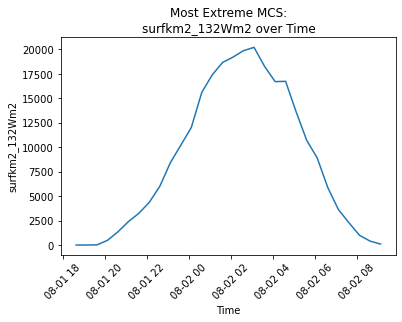

In [43]:
#-- 4. Visualize extreme MCS variables

fig, ax = plt.subplots()
MCS_attr_ex = getattr(toocan[MCS_index].clusters, attribute_1)
most_extreme_times_list = Localdate_list[MCS_index]

plt.plot(most_extreme_times_list, MCS_attr_ex)

plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'{attribute_1}')
plt.title(f"Most Extreme MCS:\n{attribute_1} over Time")

plt.show()

In [44]:
#-- 5. Compare variable of most extreme MCS to average MCS

all_MCS_attr = [] # list where each item is a list of an attribute over time
all_MCS_attr_times = []

for MCS_i, MCS in enumerate(toocan):
    MCS_attr_i = getattr(toocan[MCS_i].clusters, attribute_1)
    MCS_attr_times_i = Localdate_list[MCS_i]
    all_MCS_attr.append(MCS_attr_i)
    all_MCS_attr_times.append(MCS_attr_times_i)


In [45]:
# lowest and greatest values from Localdate_list
lowest_time = min(min(sublist) for sublist in Localdate_list)
greatest_time = max(max(sublist) for sublist in Localdate_list)

# create time range for the bins
start_time = pd.to_datetime(lowest_time)
end_time = pd.to_datetime(greatest_time)
hourly_intervals = pd.date_range(start=start_time, end=end_time, freq='H')

In [46]:
binned_values = {}
for attr_list, time_list in zip(all_MCS_attr, all_MCS_attr_times):
    for value, time in zip(attr_list, time_list):
        bin_index = (time - start_time) // pd.Timedelta(hours=1)
        bin_time = hourly_intervals[bin_index]
        if bin_time not in binned_values:
            binned_values[bin_time] = []
        binned_values[bin_time].append(value)
        
# Now we have all of the data for all of the MCSs binned in times

In [47]:
# finding average of for each bin
average_values = {bin_time: sum(values) / len(values) for bin_time, values in binned_values.items()}

In [48]:
# getting time range from the most extreme MCS

most_extreme_start_time = min(most_extreme_times_list)
most_extreme_end_time = max(most_extreme_times_list)

In [49]:
# stripping data outside of time range of most extreme MCS
filtered_values = {bin_time: value for bin_time, value in average_values.items()
                   if most_extreme_start_time <= bin_time <= most_extreme_end_time}

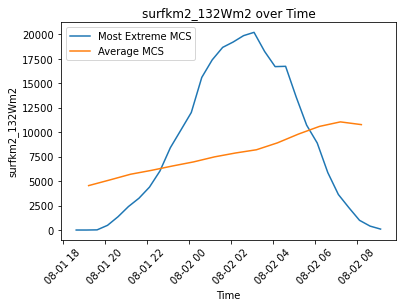

In [50]:
# Looking at just the time range of the most extreme MCS
fig, ax = plt.subplots()

plt.plot(most_extreme_times_list, MCS_attr_ex, label=f"Most Extreme MCS")
plt.plot(filtered_values.keys(), filtered_values.values(), label="Average MCS")

plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'{attribute_1}')
plt.title(f"{attribute_1} over Time")
plt.legend()

plt.show()

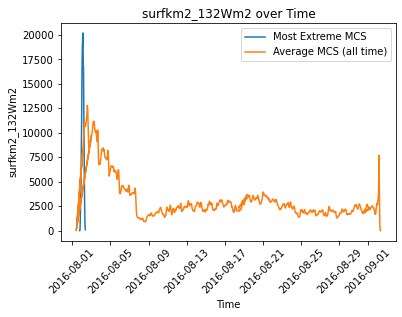

In [51]:
# In context of the entire time series
fig, ax = plt.subplots()

plt.plot(most_extreme_times_list, MCS_attr_ex, label=f"Most Extreme MCS")
plt.plot(average_values.keys(), average_values.values(), label="Average MCS (all time)")

plt.xticks(rotation=45)
ax.set_xlabel("Time")
plt.ylabel(f'{attribute_1}')
plt.title(f"{attribute_1} over Time")
plt.legend()

plt.show()

In [52]:
#-- 6a. Spatial proximity of this MCS to other MCSs

# Q: How close is the center of mass of this MCS to that of other MCSs at this timestep? Over time?


# lat, lon, time for extreme MCS:
ex_MCS_lat_list = getattr(toocan[MCS_index].clusters, "lat")
ex_MCS_lon_list = getattr(toocan[MCS_index].clusters, "lon")
most_extreme_times_list = Localdate_list[MCS_index]

In [53]:
# lat, lon, time for all MCSs:

all_MCS_lat = [] # list where each item is a list of lat over time
all_MCS_lon = []
all_MCS_attr_times = []

for MCS_i, MCS in enumerate(toocan):
    MCS_lat_i = getattr(toocan[MCS_i].clusters, "lat")
    MCS_lon_i = getattr(toocan[MCS_i].clusters, "lon")
    MCS_attr_times_i = Localdate_list[MCS_i]
    all_MCS_lat.append(MCS_lat_i)
    all_MCS_lon.append(MCS_lon_i)
    all_MCS_attr_times.append(MCS_attr_times_i)